# Keras Headline Model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
headline_data = pd.read_csv("Headline Vector.csv")

In [3]:
headline_data.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Fake
0,0.075134,0.095032,-0.018885,0.180705,-0.102905,-0.075216,-0.176351,0.073771,0.096600,0.183268,...,-0.074249,-0.071838,0.033000,-0.082937,0.046611,-0.056780,-0.076497,-0.079346,-0.049487,1.0
1,0.051987,0.013672,0.053021,-0.163184,-0.148584,-0.017378,0.009473,-0.025668,0.185156,0.015948,...,0.022070,0.054199,-0.010620,-0.011060,0.019336,-0.096582,-0.219296,-0.019531,-0.034570,1.0
2,-0.053218,-0.006348,0.029297,-0.024763,-0.101214,0.095721,0.017421,0.055664,0.077637,0.046125,...,0.054060,0.016811,0.039010,-0.062762,-0.095503,0.080261,-0.145647,-0.119036,0.022374,1.0
3,0.004852,-0.001902,0.050012,0.075821,-0.047064,-0.048322,-0.006976,-0.144267,0.094218,0.108246,...,-0.010461,-0.087931,0.035131,0.014521,-0.154073,-0.074272,-0.091553,0.031362,0.067342,1.0
4,0.041016,0.048256,0.016785,0.097397,-0.040054,-0.036987,0.063026,-0.016579,0.097771,-0.001984,...,-0.087311,-0.083374,-0.000671,-0.103638,-0.021179,0.025879,-0.113892,0.025085,0.084534,1.0


In [4]:
headline_data.dropna(inplace=True)

In [5]:
X= headline_data.drop("Fake",axis=1)
y= headline_data["Fake"]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.075134,0.095032,-0.018885,0.180705,-0.102905,-0.075216,-0.176351,0.073771,0.096600,0.183268,...,0.090658,-0.074249,-0.071838,0.033000,-0.082937,0.046611,-0.056780,-0.076497,-0.079346,-0.049487
1,0.051987,0.013672,0.053021,-0.163184,-0.148584,-0.017378,0.009473,-0.025668,0.185156,0.015948,...,0.059033,0.022070,0.054199,-0.010620,-0.011060,0.019336,-0.096582,-0.219296,-0.019531,-0.034570
2,-0.053218,-0.006348,0.029297,-0.024763,-0.101214,0.095721,0.017421,0.055664,0.077637,0.046125,...,0.025997,0.054060,0.016811,0.039010,-0.062762,-0.095503,0.080261,-0.145647,-0.119036,0.022374
3,0.004852,-0.001902,0.050012,0.075821,-0.047064,-0.048322,-0.006976,-0.144267,0.094218,0.108246,...,0.041168,-0.010461,-0.087931,0.035131,0.014521,-0.154073,-0.074272,-0.091553,0.031362,0.067342
4,0.041016,0.048256,0.016785,0.097397,-0.040054,-0.036987,0.063026,-0.016579,0.097771,-0.001984,...,-0.027811,-0.087311,-0.083374,-0.000671,-0.103638,-0.021179,0.025879,-0.113892,0.025085,0.084534


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

In [7]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
classifier = Sequential()
classifier.add(Dense(500, activation='relu', kernel_initializer='random_normal', input_dim=300))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(300, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(100, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [9]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
#Fitting the data to the training dataset
history = classifier.fit(X_train,y_train, batch_size=10, epochs=90)


Epoch 1/90
26986/26986 [==============================] - 52s 2ms/step - loss: 0.5995 - acc: 0.6755
Epoch 2/90
26986/26986 [==============================] - 17s 622us/step - loss: 0.5238 - acc: 0.7367
Epoch 3/90
26986/26986 [==============================] - 17s 644us/step - loss: 0.4593 - acc: 0.7773
Epoch 4/90
26986/26986 [==============================] - 18s 677us/step - loss: 0.3909 - acc: 0.8181
Epoch 5/90
26986/26986 [==============================] - 16s 580us/step - loss: 0.3272 - acc: 0.8497
Epoch 6/90
26986/26986 [==============================] - 15s 543us/step - loss: 0.2676 - acc: 0.8804
Epoch 7/90
26986/26986 [==============================] - 14s 521us/step - loss: 0.2166 - acc: 0.9054
Epoch 8/90
26986/26986 [==============================] - 15s 546us/step - loss: 0.1845 - acc: 0.9229
Epoch 9/90
26986/26986 [==============================] - 15s 541us/step - loss: 0.1586 - acc: 0.9342
Epoch 10/90
26986/26986 [==============================] - 15s 568us/step - loss: 0

In [11]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

26986/26986 [==============================] - 1s 28us/step


[0.015909057760661545, 0.9955161935818573]

In [8]:
X_test.shape

(273, 300)

In [12]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[109  45]
 [ 38  81]]


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6959706959706959

In [15]:
model_json = classifier.to_json()
with open("initHeadlineModel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("initHeadlineModel.h5")
print("Saved model to disk")

Saved model to disk


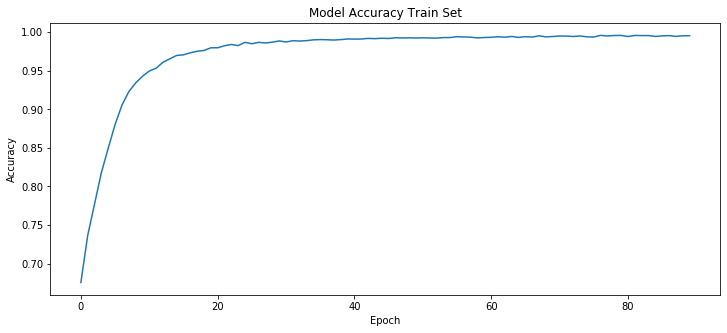

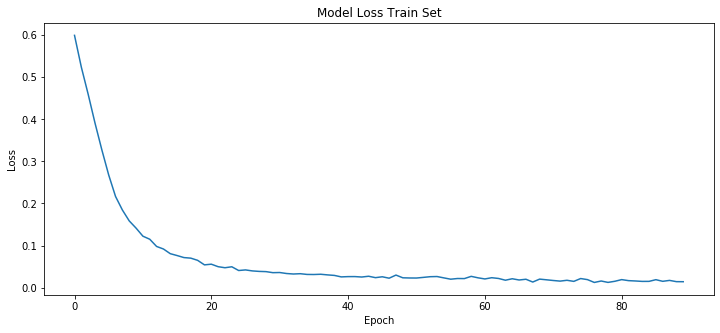

In [16]:
plt.figure(figsize=(12,5))
plt.plot(history.history['acc'])
plt.title('Model Accuracy Train Set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
print("")
print("")
print("")
print("")
print("")
print("")


plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.title('Model Loss Train Set')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [17]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to had
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.9.0
pandas==0.24.2
numpy==1.16.4
matplotlib==3.1.0


In [18]:
model_json = classifier.to_json()
with open("headlineModel.json", "w") as json_file:
    json_file.write(model_json)
classifier.save_weights("headlineModel.h5")

In [2]:
from keras.models import model_from_json

Using TensorFlow backend.


In [3]:
json_headline_file = open('headlineModel.json', 'r')
loaded_headline_model_json = json_headline_file.read()
json_headline_file.close()
loaded_headline_model = model_from_json(loaded_headline_model_json)
loaded_headline_model.load_weights("headlineModel.h5")

json_body_file = open('bodyModel.json', 'r')
loaded_body_model_json = json_body_file.read()
json_body_file.close()
loaded_body_model = model_from_json(loaded_body_model_json)
loaded_body_model.load_weights("bodyModel.h5")

KeyboardInterrupt: 